<a href="https://colab.research.google.com/github/ParbatiDebbarma/Scaler--Clustering-Business-Case/blob/main/Scaler_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Buisness Case: Scaler Clustering**

##  **About Scaler**

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.


###  **Problem Statement**
You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

### **Data Dictionary:**

- ‘**Unnamed 0**’ - Index of the dataset

- **Email_hash** - Anonymised Personal Identifiable Information (PII)

- **Company_hash** - This represents an anonymized identifier for the company, which is the current employer of the learner.

- **orgyear** - Employment start date

- **CTC** - Current CTC

- **Job_position** - Job profile in the company

- **CTC_updated_year** - Year in which CTC got updated (Yearly increments, Promotions)

In [1]:
!pip install pyclustertend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.44.0
    Uninstalling llvmlite-0.44.0:
      Successfully uninstalled llvmlite-0.44.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: numba
    Found existing installation: numba 0.61.0
    Uninstalling numba-0.61.0:
      Successfully uninstalled numba-0.61.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, b

In [2]:
# imports
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyclustertend import hopkins
import re
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
# Settings
pd.set_option('display.max_columns', None)
sns.set_style("ticks")
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/scaler_clustering.csv')
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


# **Exploratory Data Analysis**

In [4]:
print(f'Number of Rows: {df.shape[0]}\nNumber of Columns: {df.shape[1]}')

Number of Rows: 205843
Number of Columns: 7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [6]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,205843.0,NaN,NaN,NaN,103273.941786,59741.306484,0.0,51518.5,103151.0,154992.5,206922.0
company_hash,205799,37299,nvnv wgzohrnvzwj otqcxwto,8337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
email_hash,205843,153443,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
orgyear,205757.0,NaN,NaN,NaN,2014.88275,63.571115,0.0,2013.0,2016.0,2018.0,20165.0
ctc,205843.0,NaN,NaN,NaN,2271685.041993,11800914.440025,2.0,530000.0,950000.0,1700000.0,1000150000.0
job_position,153279,1016,Backend Engineer,43554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctc_updated_year,205843.0,NaN,NaN,NaN,2019.628231,1.325104,2015.0,2019.0,2020.0,2021.0,2021.0


In [7]:
df.nunique()

,0
Unnamed: 0,205843
company_hash,37299
email_hash,153443
orgyear,77
ctc,3360
job_position,1016
ctc_updated_year,7


In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,52564
ctc_updated_year,0


**Observations:**

- There are 205843 rows and 7 columns
- Backend Engineer is the most frequent Job Position in the dataset.
- There are 3 columns with Null Values
- Also in the column 'CTC' the max is 1000150000.0 whereas the mean is 950000.0, indicating presence of outliers
- The column 'Unnamed: 0' doesn't add any value to the dataset so we can drop this column.

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


## **Duplicate Data Handling**

In [11]:
# Calculating the total count of duplicate rows in the DataFrame
duplicate_count = df.duplicated().sum()

# Printing out the number of duplicate rows found
print(f'Number of duplicate rows: {duplicate_count}')

# Removing duplicate rows from the DataFrame
df = df.drop_duplicates()

# Displaying the shape of the DataFrame after duplicates are removed
df.shape


Number of duplicate rows: 34


(205809, 6)

## **Outlier treatment for Orgyear and CTC**

### **Detecting Outliers**

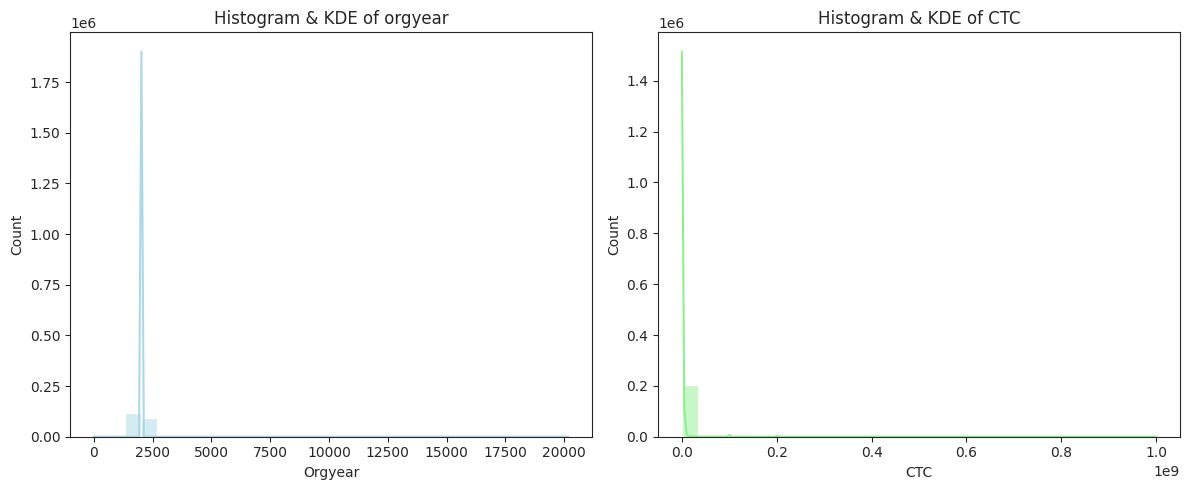

In [12]:
# Setting the figure size for two subplots
plt.figure(figsize=(12, 5))

# Histogram for 'orgyear' distribution
plt.subplot(1, 2, 1)  # 3 rows, 2 columns, first subplot
sns.histplot(df['orgyear'], bins=30, kde=True, color='lightblue')
plt.title('Histogram & KDE of orgyear')
plt.xlabel('Orgyear')

# Histogram for 'ctc' distribution
plt.subplot(1, 2, 2)  # 3 rows, 2 columns, third subplot
sns.histplot(df['ctc'], bins=30, kde=True, color='lightgreen')
plt.title('Histogram & KDE of CTC')
plt.xlabel('CTC')

# Showing the plots
plt.tight_layout()
plt.show()

**Observations:**

1. **Highly Skewed Distribution** – Both `orgyear` and `CTC` appear to be **highly right-skewed** (positive skewness), indicating that most values are concentrated on the lower end, with a few extreme values pulling the distribution to the right.

2. **Presence of Outliers** – The long right tails in both distributions suggest the presence of **outliers or extreme values**. In `orgyear`, some values seem unnaturally high (above 10,000+), which might indicate data entry errors. Similarly, `CTC` has extreme values beyond normal salary expectations.

3. **Potential Data Quality Issues** – The extreme values in both variables suggest the need for **data cleaning or transformation** (e.g., log transformation, outlier treatment) to ensure a more meaningful analysis.

### **Treating Outliers Manually**

In [13]:
#Setting boundaries to exclude outliers
orgyear_lower, orgyear_upper = (2000, 2025)
ctc_lower, ctc_upper = (100000, 10000000)

# Identifying outliers in orgyear
outlier_orgyear = df[(df['orgyear'] < orgyear_lower) | (df['orgyear'] > orgyear_upper)]
percent_outlier_orgyear = (outlier_orgyear.shape[0] / df.shape[0]) * 100

# Identifying outliers in CTC
outlier_ctc = df[(df['ctc'] < ctc_lower) | (df['ctc'] > ctc_upper)]
percent_outlier_ctc = (outlier_ctc.shape[0] / df.shape[0]) * 100

# Printing outlier percentage
print(f"The percentage of people having orgyear either less than {orgyear_lower} or more than {orgyear_upper} is: {percent_outlier_orgyear:.2f}%")
print(f"The percentage of people having ctc either less than {ctc_lower} or more than {ctc_upper} is: {percent_outlier_ctc:.2f}%")
print(f"Shape before removing outliers: {df.shape}")


# Removing outliers
df = df[
    (df['orgyear'] >= orgyear_lower) & (df['orgyear'] <= orgyear_upper) &
    (df['ctc'] >= ctc_lower) & (df['ctc'] <= ctc_upper)
]

print(f"Shape after removing outliers: {df.shape}")

The percentage of people having orgyear either less than 2000 or more than 2025 is: 0.74%
The percentage of people having ctc either less than 100000 or more than 10000000 is: 3.30%
Shape before removing outliers: (205809, 6)
Shape after removing outliers: (197473, 6)


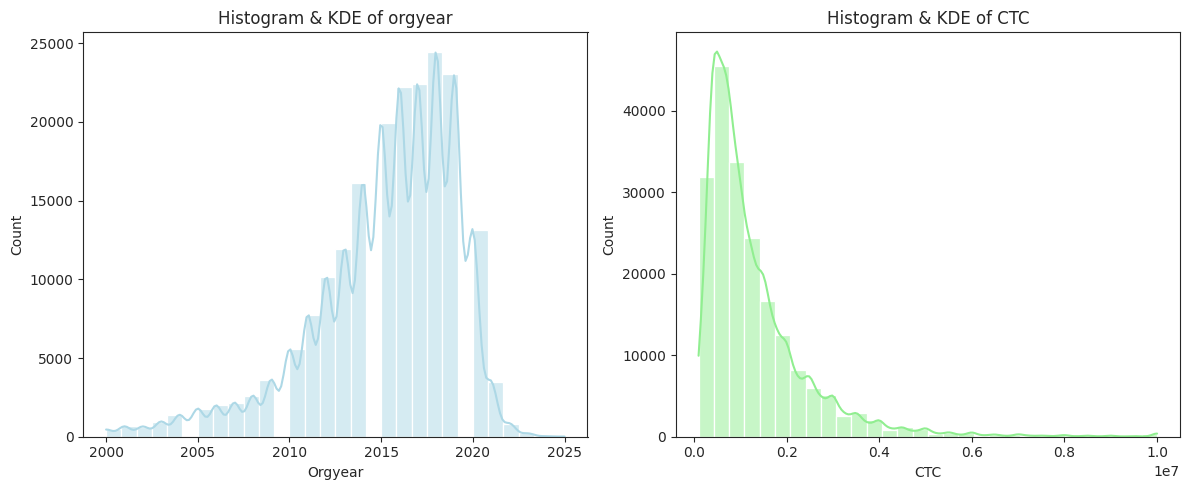

In [14]:
# Setting the figure size for two subplots
plt.figure(figsize=(12, 5))

# Histogram for 'orgyear' distribution
plt.subplot(1, 2, 1)  # 3 rows, 2 columns, first subplot
sns.histplot(df['orgyear'], bins=30, kde=True, color='lightblue')
plt.title('Histogram & KDE of orgyear')
plt.xlabel('Orgyear')

# Histogram for 'ctc' distribution
plt.subplot(1, 2, 2)  # 3 rows, 2 columns, third subplot
sns.histplot(df['ctc'], bins=30, kde=True, color='lightgreen')
plt.title('Histogram & KDE of CTC')
plt.xlabel('CTC')

# Showing the plots
plt.tight_layout()
plt.show()

**Observations:**

1. **More Normalized Distributions** – The distribution of `orgyear` and `CTC` appears much cleaner and more representative of the data, with extreme outliers removed.

2. **Better Data Spread** – The `orgyear` histogram shows a clear concentration of data points from around 2005 to 2020, indicating that most organizations were established within this period.

3. **Right-Skewed CTC Distribution Remains** – Despite outlier treatment, `CTC` still exhibits **right-skewness**, meaning most salaries are on the lower end, with a gradual decline as salaries increase. However, the tail is now much more controlled compared to before.

In [15]:
# Converting orgyear and ctc_updated_year from float64 to int64
df['orgyear'] = df['orgyear'].astype('int64')
df['ctc_updated_year'] = df['ctc_updated_year'].astype('int64')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197473 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   company_hash      197431 non-null  object
 1   email_hash        197473 non-null  object
 2   orgyear           197473 non-null  int64 
 3   ctc               197473 non-null  int64 
 4   job_position      146472 non-null  object
 5   ctc_updated_year  197473 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 10.5+ MB


## **Null Values Treatment**

In [17]:
df.isna().sum()

,0
company_hash,42
email_hash,0
orgyear,0
ctc,0
job_position,51001
ctc_updated_year,0


In [18]:
# Filling missing values
df['company_hash'] = df['company_hash'].fillna("Not Available")
df['job_position'] = df['job_position'].fillna("Not Available")

In [19]:
df.isnull().sum().sum()

0

## **Removing Special Characters using Regex**

In [20]:
# Selecting only object (string) columns
string_cols = df.select_dtypes(include=['object']).columns

# Applying regex replacement to clean special characters
df[string_cols] = df[string_cols].astype(str).replace(r'[^A-Za-z0-9 ]+', '', regex=True)

## **Unique Emails and their Frequency of occurence**

In [21]:
# Counting occurrences of each unique email_hash
email_counts = df['email_hash'].value_counts().reset_index()
email_counts.columns = ['email_hash', 'frequency']

# Calculating percentage occurrence
email_counts['percentage'] = (email_counts['frequency'] / df.shape[0]) * 100

# Printing summary
print(f"Total unique email hashes: {email_counts.shape[0]}")
print(f"Emails appearing more than once: {email_counts[email_counts['frequency'] > 1].shape[0]}")



email_summary_df = email_counts
email_summary_df.head()

Total unique email hashes: 146449
Emails appearing more than once: 40100


,email_hash,frequency,percentage
0,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,10,0.005064
1,3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...,9,0.004558
2,298528ce3160cc761e4dc37a07337ee2e0589df251d736...,9,0.004558
3,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,9,0.004558
4,faf40195f8c58d5c7edc758cc725a762d51920da996410...,8,0.004051


# **Feature Engineering**

In [22]:
# Finding Years of Experience based on orgyear and current year(2025)
current_year = datetime.now().year
df['years_of_experience'] = current_year - df['orgyear']
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,9
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,7
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,10
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,8
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,8


# **Statistical Summary**

In [23]:
df.describe()

,orgyear,ctc,ctc_updated_year,years_of_experience
count,197473.000000,1.974730e+05,197473.000000,197473.000000
mean,2015.270042,1.305667e+06,2019.651806,9.729958
std,3.895825,1.169496e+06,1.315731,3.895825
min,2000.000000,1.000000e+05,2015.000000,0.000000
25%,2013.000000,5.600000e+05,2019.000000,7.000000
50%,2016.000000,9.500000e+05,2020.000000,9.000000
75%,2018.000000,1.650000e+06,2021.000000,12.000000
max,2025.000000,1.000000e+07,2021.000000,25.000000


In [24]:
df.describe(include = 'object')

,company_hash,email_hash,job_position
count,197473,197473,197473
unique,34688,146449,953
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Not Available
freq,8162,10,51001


**Observations**

- **Orgyear**: Learners typically started working around 2015/2016 (median 2016), with most start years falling between 2013 and 2018. A few have very early (2003) or future-dated starts (2025).
- **CTC**: The median is around 950k, and the average is ~1.28M (with a high spread of ±1.20M). The top quartile earns more than 1.6M, and the maximum goes up to 12.5M, indicating a significant salary range.
- **CTC Updated Year**: On average, salaries were updated around 2019–2020, with the earliest update at 2015 and the latest at 2021, suggesting most increments occurred in the last few years.
- **Years of Experience**: The mean is ~9.7 years, with half the learners between 7–12 years of experience; the maximum observed is 25 years, indicating a mix of junior to very senior professionals.
- **Categorical Features**:
  - company_hash has 34,688 unique companies, with one particular hash appearing 8,162 times, suggesting a large concentration in a few big companies.
  - job_position has 953 unique titles, but “Not Available” is notably frequent (51,0011), indicating either a catch-all category or numerous less-common roles.

# **Univariate Analysis**

**CTC Distribution**

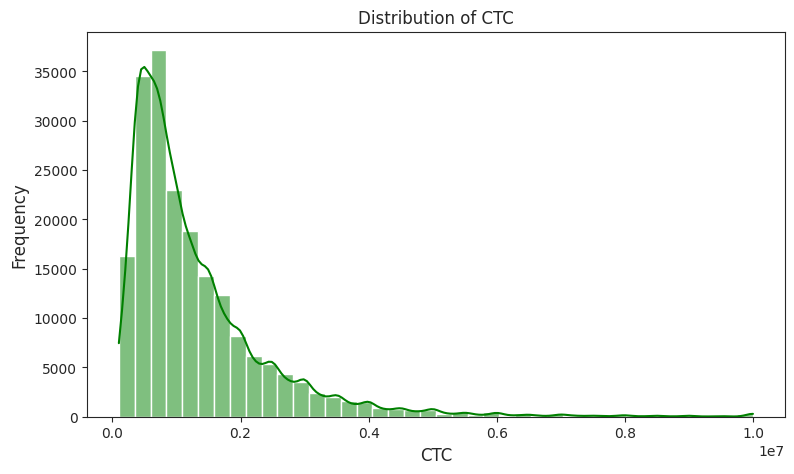

In [25]:
# Plotting the distribution (Histogram + KDE)
plt.figure(figsize=(9, 5))
sns.histplot(data=df, x="ctc", kde=True, bins=40, color = 'green')
plt.title("Distribution of CTC", fontsize=12)
plt.xlabel("CTC", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

**Observations**

- Salaries in this dataset go all the way up to 10 million, suggesting a very wide range in earning potential or outliers.
- The bulk of participants earn below 300K, indicating that typical pay is in that lower segment.
- Only a small fraction of learners receive significantly higher salaries, pointing to a noticeable gap between the majority and the highest earners.

### **Distribution of `'years_of_experience'`**

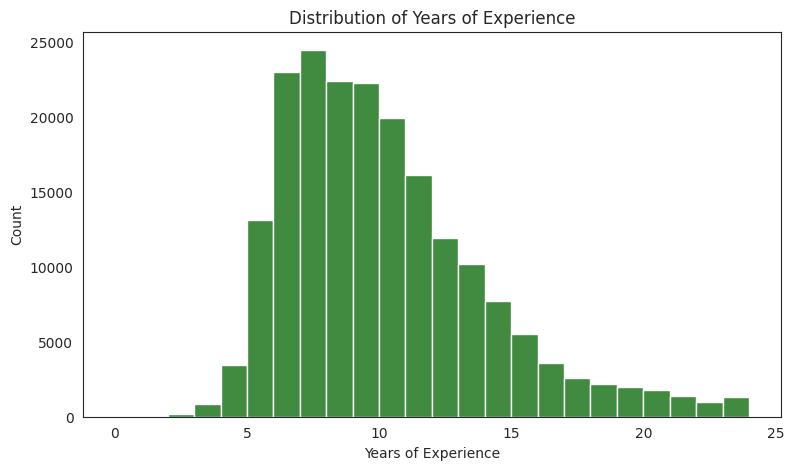

In [26]:
sns.set_style("white")

plt.figure(figsize=(9,5))
sns.histplot(data=df, x="years_of_experience", bins=range(0, 25), kde=False, color = 'darkgreen')
plt.title("Distribution of Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Count")
plt.show()

**Observations:**

- The most common experience level appears to cluster around 5-6 years, after which the count gradually declines.
- A large share of learners have between 2 and 10 years of experience, indicating a mid-career audience.
- Very few learners possess 15 or more years of experience, suggesting a smaller population of highly seasoned professionals.

**CTC Updated Years**

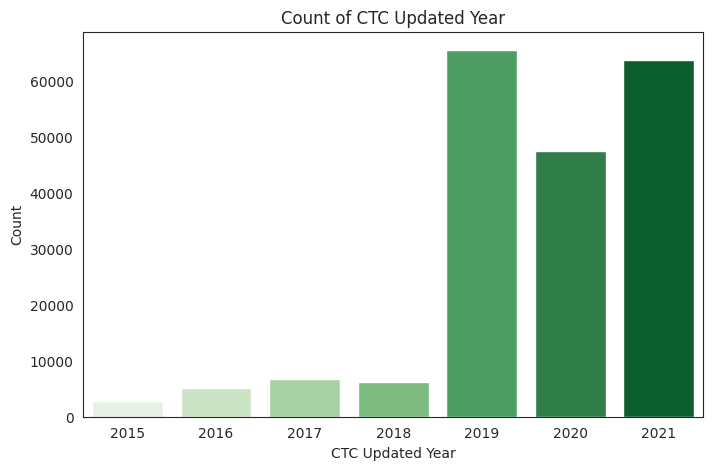

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="ctc_updated_year", palette ='Greens')
plt.title("Count of CTC Updated Year")
plt.xlabel("CTC Updated Year")
plt.ylabel("Count")
plt.show()

Observations:

- The highest number of salary updates occurred in 2019, followed by 2021, indicating that most learners’ CTC adjustments happened in these recent years.
- Updates from 2015 through 2018 are comparatively fewer, suggesting fewer salary revisions—or less recorded data—from earlier years.
- The jump in 2020 and 2021 shows continued salary adjustments, reflecting a strong trend of pay revisions in the last few years.

### **Top 10 Job Positions**

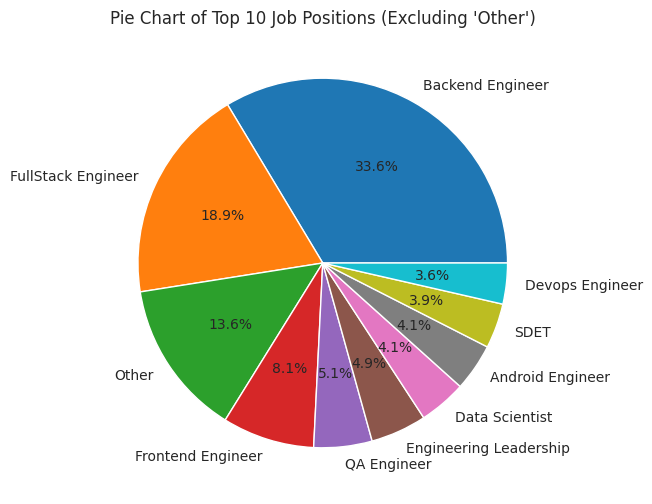

In [28]:
# Counting job positions
job_counts = df["job_position"].value_counts()

# Excluding the "Not Available" category
filtered_jobs = job_counts[~job_counts.index.isin(["Not Available"])]

# Taking the top 10 from the filtered data
top_10_jobs = filtered_jobs.head(10)

# Plotting a pie chart for the top 10
plt.figure(figsize=(6, 6))
plt.pie(top_10_jobs, labels=top_10_jobs.index, autopct='%1.1f%%')
plt.title("Pie Chart of Top 10 Job Positions (Excluding 'Other')")
plt.show()

**Observations:**

- The top 10 job positions make up the majority of the dataset, with fewer positions holding a smaller share
- The largest share of job positions is occupied by a specific group, indicating a concentration in a few common roles.
- A wide variety of job titles remain in the lower percentages, suggesting a diverse range of niche roles in the dataset.
- Backend Engineer dominates the top 10 job roles, making up nearly 40% of this segment.
- FullStack Engineer is the next most common at around 20%, followed by Frontend and QA roles.
- The remaining positions (Data Scientist, SDET, DevOps, Android, etc.) each account for a smaller but still notable share, reflecting a diverse range of engineering specializations.

### **Top 10 Companies**

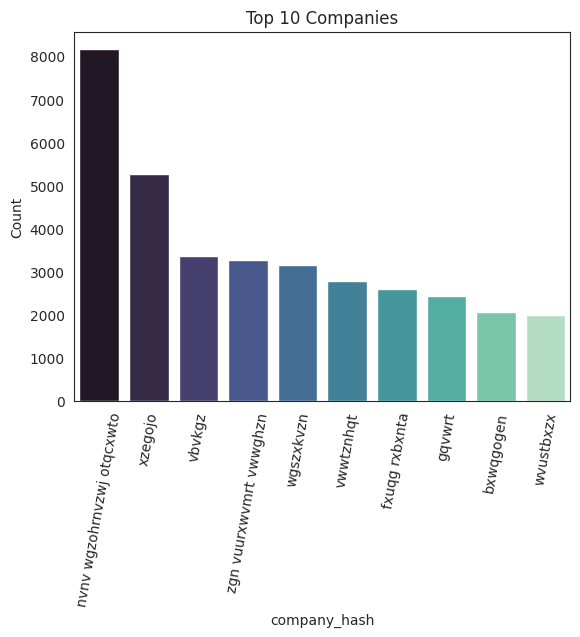

In [29]:
top_companies = df["company_hash"].value_counts().head(10)
sns.barplot(x=top_companies.index, y=top_companies.values, palette='mako')
plt.title("Top 10 Companies")
plt.xticks(rotation=80)
plt.ylabel("Count")
plt.show()

**Observations**

- One company (the first bar) clearly dominates, with over 8,000 records—nearly twice as many as the second‐place firm.
- The second and third companies also have large enrollments (around 4,500–5,000 each), reflecting a strong presence in the dataset.
- The remaining top 10 companies range between 2,000 and 3,500 records, indicating that a handful of major employers account for a significant share of learners.

# **Bivariate Analysis**

### **CTC Vs Years Of Experience**

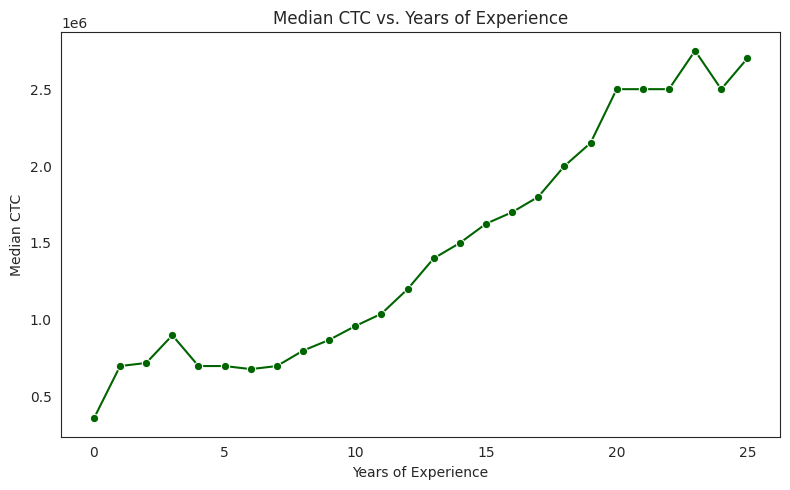

In [30]:
# Dropping rows where 'ctc' or 'years_of_experience' values are missing
df_filtered = df.dropna(subset=['ctc', 'years_of_experience'])

# Calculating the median CTC for each years of experience group
median_ctc = df_filtered.groupby('years_of_experience')['ctc'].median()

# Setting the figure size for better visibility
plt.figure(figsize=(8, 5))

# Plotting a line graph to visualize the median CTC trend across experience levels
sns.lineplot(x=median_ctc.index, y=median_ctc.values, marker='o', color='darkgreen')

# Adding title and labels for better readability
plt.title("Median CTC vs. Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Median CTC")

plt.tight_layout()

plt.show()


**Observations:**

- **Positive Correlation**: There is a clear upward trend indicating that **CTC increases with experience**. Professionals with more years of experience generally earn higher salaries.
- **Early Career Fluctuations**: In the initial years (0-5 years), **CTC shows some fluctuations** but stabilizes over time, suggesting that early-career salary growth can be inconsistent.
- **Steady Growth Post 5-10 Years**: After **10+ years of experience**, the median CTC **consistently increases**, showing a strong link between experience and salary progression in tech roles.

### **CTC by Job Position**

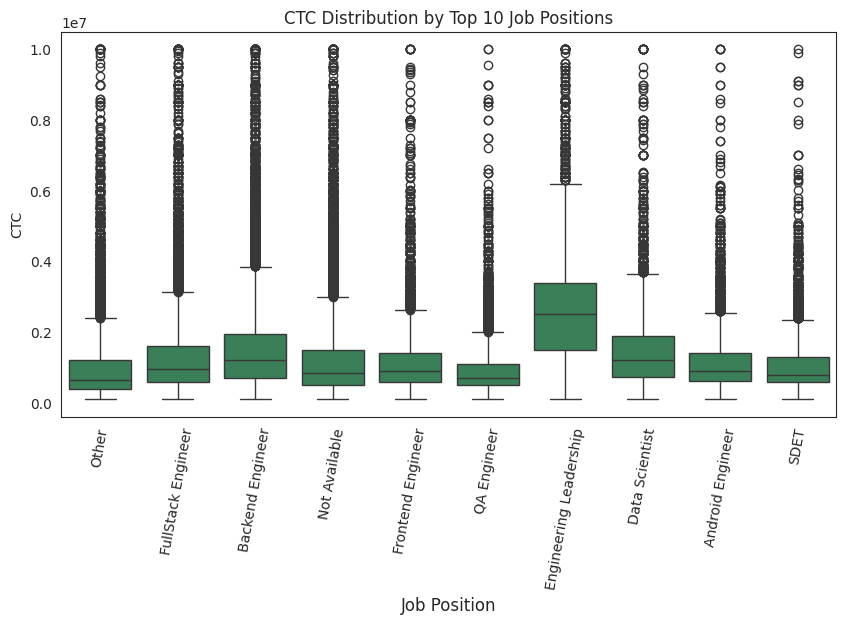

In [31]:
# Focusing on top 10 job positions to keep the plot readable
top_positions = df["job_position"].value_counts().head(10).index
filtered_df = df[df["job_position"].isin(top_positions)]

plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_df, x="job_position", y="ctc", color = 'seagreen')
plt.title("CTC Distribution by Top 10 Job Positions")
plt.xlabel("Job Position", fontsize='12')
plt.ylabel("CTC")
plt.xticks(rotation=80)
plt.show()

**Observations:**

- Engineering Leadership commands the highest median pay among these roles, though the wide spread indicates a range of leadership roles with varying compensation levels.
- Data Scientist salaries also trend high, with numerous outliers at the upper end, suggesting significant earning potential in specialized data-focused positions.
- QA Engineers appear to have a lower median salary relative to other positions, with a somewhat narrower overall distribution.

## **Correlation Heatmap (Numeric Variables)**

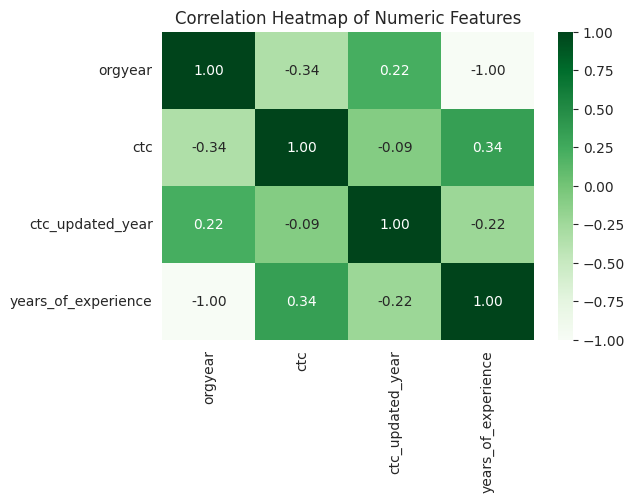

In [32]:
# Defining the list of numeric columns to analyze correlation
numeric_cols = ["orgyear", "ctc", "ctc_updated_year", "years_of_experience"]

# Calculating the correlation matrix for the selected numeric columns
corr = df[numeric_cols].corr()

# Setting the figure size for better readability
plt.figure(figsize=(6, 4))

# Creating a heatmap to visualize the correlation between numeric features
sns.heatmap(corr, annot=True, cmap="Greens", fmt=".2f")

# Adding a title for better context
plt.title("Correlation Heatmap of Numeric Features")

# Displaying the heatmap
plt.show()


**Observations**

- **CTC and experience**: The strongest positive correlation (around 0.30) is between CTC and years of experience, indicating that more experienced professionals tend to have higher compensation.  
- **Orgyear vs. experience**: There's a modest negative correlation (-0.23) between orgyear and years of experience, suggesting that (depending on how orgyear is defined) older organizations may have a workforce with slightly lower average experience, or vice versa.  
- **Minimal impact of update year**: CTC's correlation with ctc_updated_year is near zero (-0.06), implying that the year in which compensation was last updated does not strongly influence overall pay levels.

### **Job Positions accross Experience Levels**

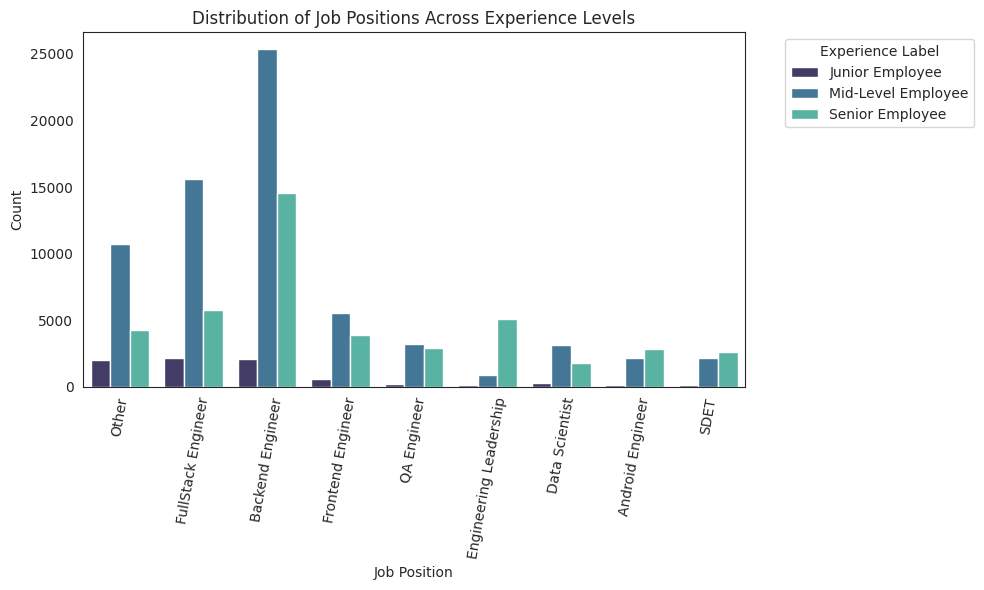

In [33]:
# Defining bins for labeling experience without modifying the DataFrame
bins = [-1, 5, 10, np.inf]  # -1 to ensure 0 years fall into the first bin
labels = ["Junior Employee", "Mid-Level Employee", "Senior Employee"]

# Getting top job positions (excluding 'Not Available')
top_positions = df["job_position"].value_counts().head(10).index.tolist()
if "Not Available" in top_positions:
    top_positions.remove("Not Available")

# Filtering data for visualization
df_filtered = df[df["job_position"].isin(top_positions)]

# Creating the countplot with the experience labels directly
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_filtered,
    x="job_position",
    hue=pd.cut(df_filtered["years_of_experience"], bins=bins, labels=labels),  # Binning dynamically
    palette="mako"
)

# Formatting the plot
plt.title("Distribution of Job Positions Across Experience Levels")
plt.xlabel("Job Position")
plt.ylabel("Count")
plt.xticks(rotation=80)
plt.legend(title="Experience Label", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Displaying the plot
plt.show()


**Observations**

- **Mid-Level Employees Dominate**: Most job positions have the highest count in the **Mid-Level Employee** category, indicating that a large portion of professionals in the dataset have moderate experience.
- **Backend and FullStack Engineers Are Common**: These two job roles have the highest number of employees across all experience levels, suggesting strong demand for these skills in the industry.
- **Senior Employees Are Less Common**: The number of **Senior Employees** is lower compared to **Mid-Level Employees**, but in certain roles like **Engineering Leadership**, the senior category has significant representation.

# **Manual Clustering**

**Purpose of this approach**
- Benchmarking learners within very specific cohorts: (Company, Job Position, Years of Experience), slightly broader groups, and finally at the company level. This ensures a more context‐aware comparison of salaries.
- Creating flags (designation, class, tier) to quickly identify who is below, at, or above average within each grouping, helping stakeholders or HR teams make data‐driven decisions on salary adjustments.
- Manually clustering to reflect real‐world hierarchies (company → department/job → experience level) rather than using a generic clustering algorithm, thus aligning with business context and practical insights.

## **Getting the 5 point summary of CTC on the basis of Company, Job Position, Years of Experience**

In [34]:
# Ensuring Years_of_Experience is numeric
df['years_of_experience'] = pd.to_numeric(df['years_of_experience'], errors='coerce')

# Dropping missing values in relevant columns
df_filtered = df.dropna(subset=['company_hash', 'job_position', 'years_of_experience', 'ctc'])

# Computing summary statistics
ctc_summary = df_filtered.groupby(['company_hash', 'job_position', 'years_of_experience'])['ctc'].agg(
    mean_ctc='mean',
    median_ctc='median',
    max_ctc='max',
    min_ctc='min',
    std_ctc='std',  # Standard deviation for variability insights
    num_employees='count'  # Rename count column for clarity
).reset_index()

print("Computed 5-point summary of CTC with standard deviation.\n")

# Computing CTC summary
ctc_summary_df = ctc_summary
ctc_summary_df.head()

Computed 5-point summary of CTC with standard deviation.



,company_hash,job_position,years_of_experience,mean_ctc,median_ctc,max_ctc,min_ctc,std_ctc,num_employees
0,0,Not Available,5,100000.0,100000.0,100000,100000,NaN,1
1,0,Other,5,100000.0,100000.0,100000,100000,NaN,1
2,0000,Other,8,300000.0,300000.0,300000,300000,NaN,1
3,01 ojztqsj,Android Engineer,9,270000.0,270000.0,270000,270000,NaN,1
4,01 ojztqsj,Frontend Engineer,14,830000.0,830000.0,830000,830000,NaN,1


### **Merging the Summary Back & Creating the “designation” Flag**

In [35]:
# Merging the main dataframe with the summary dataframe (ctc_summary_df)
# based on 'company_hash', 'job_position', and 'years_of_experience'
df = df.merge(
    ctc_summary_df,
    on=['company_hash', 'job_position', 'years_of_experience'],
    how='left'
)

# Removing rows where either 'ctc' or 'mean_ctc' values are missing
df = df.dropna(subset=['ctc', 'mean_ctc'])

# Assigning a designation category based on the comparison of 'ctc' with 'mean_ctc'
# 1 = Above average (more than 10% higher than mean_ctc)
# 2 = Average (within ±10% of mean_ctc)
# 3 = Below average (more than 10% lower than mean_ctc)
df['designation'] = df.apply(
    lambda row: 1 if row['ctc'] > row['mean_ctc'] * 1.1 else (3 if row['ctc'] < row['mean_ctc'] * 0.9 else 2),
    axis=1
)


In [36]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,mean_ctc,median_ctc,max_ctc,min_ctc,std_ctc,num_employees,designation
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,9,1.100000e+06,1100000.0,1100000,1100000,NaN,1,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,7,7.742856e+05,750000.0,1200000,449999,250922.324350,7,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,10,2.000000e+06,2000000.0,2000000,2000000,NaN,1,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,8,1.158571e+06,1200000.0,1750000,700000,404780.951933,7,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,8,1.400000e+06,1400000.0,1400000,1400000,NaN,1,2


### **Doing the Same Analysis at (Company, Job Position) Level => “class” Flag**

In [37]:
# Grouping the dataframe by 'company_hash' and 'job_position'
# to calculate the mean CTC at the class level
class_summary = df.groupby(['company_hash', 'job_position'], as_index=False)['ctc'].agg(
    mean_ctc_class='mean'
)

# Merging the class-level summary back into the main dataframe
# to add the mean CTC for each job position within a company
df = df.merge(
    class_summary, on=['company_hash', 'job_position'], how='left', suffixes=('', '_class')
)

# Dropping rows where 'ctc' or 'mean_ctc_class' is missing to ensure clean data
df = df.dropna(subset=['ctc', 'mean_ctc_class'])

# Assigning a class category based on how 'ctc' compares to 'mean_ctc_class'
# 1 = Above class average (more than 10% higher than mean_ctc_class)
# 2 = Within class average (within ±10% of mean_ctc_class)
# 3 = Below class average (more than 10% lower than mean_ctc_class)
df['class'] = df.apply(
    lambda row: 1 if row['ctc'] > row['mean_ctc_class'] * 1.1 else (3 if row['ctc'] < row['mean_ctc_class'] * 0.9 else 2),
    axis=1
)

# Displaying the first few rows of the updated dataframe
df.head()


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,mean_ctc,median_ctc,max_ctc,min_ctc,std_ctc,num_employees,designation,mean_ctc_class,class
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,9,1.100000e+06,1100000.0,1100000,1100000,NaN,1,2,1.085000e+06,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,7,7.742856e+05,750000.0,1200000,449999,250922.324350,7,3,9.511363e+05,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,10,2.000000e+06,2000000.0,2000000,2000000,NaN,1,2,2.000000e+06,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,8,1.158571e+06,1200000.0,1750000,700000,404780.951933,7,3,1.500000e+06,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,8,1.400000e+06,1400000.0,1400000,1400000,NaN,1,2,8.466667e+05,1


### **Doing the Same Analysis at Company Level => “tier” Flag**

In [38]:
# Grouping the dataframe by 'company_hash'
# to calculate the mean CTC at the company (tier) level
tier_summary = df.groupby(['company_hash'], as_index=False)['ctc'].agg(
    mean_ctc_tier='mean'
)

# Merging the tier-level summary back into the main dataframe
# to add the mean CTC for each company
df = df.merge(
    tier_summary, on=['company_hash'], how='left', suffixes=('', '_tier')
)

# Dropping rows where 'ctc' or 'mean_ctc_tier' is missing to ensure clean data
df = df.dropna(subset=['ctc', 'mean_ctc_tier'])

# Assigning a tier category based on how 'ctc' compares to 'mean_ctc_tier'
# 1 = Above company average (more than 10% higher than mean_ctc_tier)
# 2 = Within company average (within ±10% of mean_ctc_tier)
# 3 = Below company average (more than 10% lower than mean_ctc_tier)
df['tier'] = df.apply(
    lambda row: 1 if row['ctc'] > row['mean_ctc_tier'] * 1.1 else (3 if row['ctc'] < row['mean_ctc_tier'] * 0.9 else 2),
    axis=1
)

# Displaying the first few rows of the updated dataframe
df.head()


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,mean_ctc,median_ctc,max_ctc,min_ctc,std_ctc,num_employees,designation,mean_ctc_class,class,mean_ctc_tier,tier
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,9,1.100000e+06,1100000.0,1100000,1100000,NaN,1,2,1.085000e+06,2,1.115667e+06,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,7,7.742856e+05,750000.0,1200000,449999,250922.324350,7,3,9.511363e+05,3,1.197093e+06,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,10,2.000000e+06,2000000.0,2000000,2000000,NaN,1,2,2.000000e+06,2,2.000000e+06,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,8,1.158571e+06,1200000.0,1750000,700000,404780.951933,7,3,1.500000e+06,3,1.713929e+06,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,8,1.400000e+06,1400000.0,1400000,1400000,NaN,1,2,8.466667e+05,1,9.400000e+05,1


In [39]:
df.shape

(197473, 18)

1. **Designation**  
   - Groups by: **Company + Job Position + Years of Experience**  
   - Compares each learner’s CTC within a very **specific** cohort of (company, role, and experience).  
   - Most granular comparison.

2. **Class**  
   - Groups by: **Company + Job Position**  
   - Compares each learner’s CTC at the **role level** within their company, *regardless* of specific years of experience.  
   - Slightly broader grouping than “designation.”

3. **Tier**  
   - Groups by: **Company**  
   - Compares each learner’s CTC at the **overall company** level, ignoring job role and experience differences.  
   - Broadest grouping among the three.

### **Top 10 employees (earning more than most of the employees in the company) - Tier 1**

In [40]:
# 1. Filtering to only those employees who have tier = 1
#    (above the average within their company).
top_tier_employees = df[df["tier"] == 1]

# 2. Sorting these employees in descending order of their CTC.
top_tier_employees = top_tier_employees.sort_values(by="ctc", ascending=False)

# 3. Selecting the Top 10
top_10_employees = top_tier_employees.head(10)

# 4. Displaying or process the results
top_10_employees.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,mean_ctc,median_ctc,max_ctc,min_ctc,std_ctc,num_employees,designation,mean_ctc_class,class,mean_ctc_tier,tier
57661,zgn vuurxwvmrt vwwghzn,f7fcdb6e7bdefbb27b9b863e70e6528a0b5f021ca76419...,2013,10000000,Not Available,2021,12,1.584815e+06,1000000.0,10000000,200000,1.954774e+06,54,1,9.083628e+05,1,9.286216e+05,1
73949,znn avnv otqcxwto,7ea86c531242060fc1b65133059914144169327624f4c8...,2016,10000000,Not Available,2020,9,2.164286e+06,1000000.0,10000000,600000,3.458891e+06,7,1,1.088071e+06,1,9.887708e+05,1
33540,zgn vuurxwvmrt vwwghzn,005b34316f63b4d9f979e4a0ff8452d7ec17cff51d1249...,2016,10000000,Engineering Leadership,2021,9,2.306666e+06,504999.5,10000000,200000,3.838915e+06,6,1,1.677984e+06,1,9.286216e+05,1
59350,ctqxnvo ntwyzgrgsxto rrw,6fc180d7c4ecbb34c902343386196024fda535bd934522...,2018,10000000,Backend Engineer,2019,7,2.218889e+06,1400000.0,10000000,120000,3.027232e+06,9,1,1.592459e+06,1,1.600294e+06,1
14584,otre tburgjta,aa0bb498013a8763c7efe4a872f54240b12a162e3e4a4f...,2018,10000000,Support Engineer,2021,7,3.600000e+06,600000.0,10000000,200000,5.546170e+06,3,1,1.175000e+06,1,1.093456e+06,1


In [41]:
top_10_employees = top_10_employees[['email_hash', 'company_hash','tier',  'ctc']].head(10)
top_10_employees

,email_hash,company_hash,tier,ctc
57661,f7fcdb6e7bdefbb27b9b863e70e6528a0b5f021ca76419...,zgn vuurxwvmrt vwwghzn,1,10000000
73949,7ea86c531242060fc1b65133059914144169327624f4c8...,znn avnv otqcxwto,1,10000000
33540,005b34316f63b4d9f979e4a0ff8452d7ec17cff51d1249...,zgn vuurxwvmrt vwwghzn,1,10000000
59350,6fc180d7c4ecbb34c902343386196024fda535bd934522...,ctqxnvo ntwyzgrgsxto rrw,1,10000000
14584,aa0bb498013a8763c7efe4a872f54240b12a162e3e4a4f...,otre tburgjta,1,10000000
73786,1a14821a6a4dd7fad9b96d52d93f0a71e7bbbce292e807...,wxowg,1,10000000
73817,35870d0203ba717b4522dc0de17ea3ae7934c4825c3c07...,zgn vuurxwvmrt vwwghzn,1,10000000
114399,ec36bb53c1e512c40c87d7b9f9584c31b54f12a09fdb18...,zgn vuurxwvmrt vwwghzn,1,10000000
114385,c74d843588ff8b4018cfd538dc8f75207a7649e29ba4d6...,nvnv wgzohrnvzwj otqcxwto,1,10000000
14825,3f77ca896af6987904493e17db1df673511b8fbf03f5e3...,mvjtq,1,10000000


### **Top 10 employees of data science in each company earning more than their peers - Class 1**

In [42]:
# 1. Filtering only 'Data Science' roles
# 2. Filtering employees whose "class" indicates they earn more than their peers
#    (1 = above average).
data_science_top = df[
    (df["job_position"].str.lower() == "data scientist") &
    (df["class"] == 1)
]

# 3. Grouping by company_hash and picking the top 10 (by CTC) within each company.
#    nlargest() is a handy way to do this. We'll then reset the index for a clean table.
top_10_each_company = (
    data_science_top.groupby("company_hash", group_keys=True, as_index=False)
    .apply(lambda grp: grp.nlargest(10, "ctc"))
    .reset_index(drop=True))

top_10_each_company = top_10_each_company[['company_hash', 'email_hash', 'class', 'ctc']].head(10)

# Sorting by ctc for better readability
top_10_each_company_sorted = top_10_each_company.sort_values(by="ctc", ascending=False)
top_10_each_company_sorted.head(10)

,company_hash,email_hash,class,ctc
6,adw ntwyzgrgsj,74aaf8eb0536ecc80e60fbfd706c07075f768657b4ae84...,1,2790000
0,247vx,9d2537610d57179230806bb77258f63c3134b8fde9aa3a...,1,2600000
1,247vx,ddd9683a58865398ed934ee7faeb0825e515f2fe3cdaad...,1,2500000
7,adw ntwyzgrgsj,8a1e6a36db44c5ed8abe45ae0889577b2454e9025e7079...,1,2350000
5,Not Available,c1ef4ed5eeb40dcacbb5f7d0fc345fb77c6176024eb239...,1,2000000
2,3p ntwyzgrgsxto,af617ba27ec944771314f1c2d739b8208d2b3337800f8f...,1,1800000
8,adw ntwyzgrgsxto,d561093f7768b6db57a81e98f90897028dcf48881123d8...,1,1760000
9,adw ntwyzgrgsxto,48a8a96b2f7e20c1f3e72b6492797a26cd4f7d373f971b...,1,1760000
3,3rgi,a372713f7d18e6f03b5b469cbd1ddb8145c2688597c528...,1,1710000
4,3rgi,c27536d2fe174089c62eca78e6e643baef88a6100c1404...,1,1500000


### **Bottom 10 employees of data science in each company earning less than their peers - Class 3**

In [43]:
# Filtering rows to keep only "Data Science" roles (case-insensitive)
#    and those whose "class" indicates they're below average in their group (class=3).
data_science_bottom = df[
    (df["job_position"].str.lower() == "data scientist") &
    (df["class"] == 3)
]

# Selecting the bottom 10 by 'ctc', within each company.
#    'nsmallest' helps get the lowest 10 values in each group.
bottom_10_each_company = (
    data_science_bottom.groupby("company_hash", group_keys=True, as_index=False)
    .apply(lambda grp: grp.nsmallest(10, "ctc"))
    .reset_index(drop=True)
)

# We can look at the results:
bottom_10_each_company = bottom_10_each_company[['company_hash', 'email_hash', 'class', 'ctc']].head(10)
bottom_10_each_company_sorted = bottom_10_each_company.sort_values(by="ctc", ascending=True)
bottom_10_each_company_sorted.head(10)

,company_hash,email_hash,class,ctc
2,3rgi,24db964005796c656431df0b035768e8b9cee21f8cf425...,3,600000
5,adw ntwyzgrgsj,c4420d1b47d52e5237b85b0f65e62ed8645b1b032d01c9...,3,680000
6,adw ntwyzgrgsj,6ca1d030df1927f2c0904548a99dea059fd0aeaf39cb21...,3,700000
3,3rgi,5c67aa9b1414eb0dc68b6acc70c978f0b429e1f24f32a9...,3,800000
7,adw ntwyzgrgsj,1443f6d836c4dc24a7a79f7f81702e6b684abdd22ea50e...,3,800000
8,adw ntwyzgrgsj,f77930e695dabbd49c7e2dc1d9cfe96c1d3b4808418c65...,3,850000
9,adw ntwyzgrgsj,9d8dcc11f1524e2b9837295c74aa304420812e4044b2d5...,3,880000
4,Not Available,d9d7be8e4e4e5b6eb1092772d366c6bb21c8502e0e8253...,3,910000
1,3p ntwyzgrgsxto,89901f32acc07b5ca10c4ee5a9afda6de831cb84a0cbeb...,3,1000000
0,247vx,5f4b52a1c2539fe2e4b29a8470bc57dbace331b819a0af...,3,1440000


### **Bottom 10 employees (earning less than most of the employees in the company)- Tier 3**

In [44]:
# Filtering rows where tier == 3 (lowest earners by company-level comparison).
lowest_tier = df[df["tier"] == 3]

# Grouping by company_hash and selecting the bottom 10 by CTC within each company.
bottom_10_in_company = (
    lowest_tier
    .groupby("company_hash", group_keys=True, as_index=False)
    .apply(lambda grp: grp.nsmallest(10, "ctc"))
    .reset_index(drop=True)
)

# Reviewing the result
bottom_10_in_company = bottom_10_in_company[['company_hash', 'email_hash', 'class','tier', 'ctc']].head(10)

# Sorting by ctc for better readability
bottom_10_in_company_sorted = bottom_10_in_company.sort_values(by="ctc", ascending=True)
bottom_10_in_company_sorted.head(10)

,company_hash,email_hash,class,tier,ctc
1,1,8cc7aba49e96a0a80f7ed6c2ed79bc1d1e81171a28445c...,2,3,100000
0,01 ojztqsj,819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...,2,3,270000
4,159 ogrhnxgzo,34899d76060c1f9885967e7b07557104a93d67690d5378...,3,3,500000
5,159 ogrhnxgzo,34899d76060c1f9885967e7b07557104a93d67690d5378...,3,3,500000
6,1bs,6cb3cf1291c0a186d4d1ed254c0e5b95f8498bccc814d5...,3,3,600000
7,1bs,6cb3cf1291c0a186d4d1ed254c0e5b95f8498bccc814d5...,3,3,600000
2,1 jtvq,26a4487b5be40da1e942bf3bc1189172727de0e1c74c5e...,3,3,660000
8,1bs,9977fcf096a81795abeb0829760e399a0a7a727ebf8bbb...,3,3,700000
9,1bs,9977fcf096a81795abeb0829760e399a0a7a727ebf8bbb...,3,3,700000
3,123ongqto,acecb5f871cc747f6111d5b7527a06839178adfe8ec3fe...,2,3,1030000


### **Top 10 employees in each company - having 5/6/7 years of experience earning more than their peers**

In [45]:
# Filtering to include only rows with 5, 6, or 7 years of experience
filtered_df = df[df["years_of_experience"].isin([5, 6, 7])]

# Grouping by company_hash, then pick the top 10 (by CTC) within each company
top_10_in_each_company = (
    filtered_df
    .groupby("company_hash", group_keys=True, as_index=False)
    .apply(lambda grp: grp.nlargest(10, "ctc"))
    .reset_index(drop=True)
)

# Inspecting the result
top_10_in_each_company = top_10_in_each_company[['company_hash', 'email_hash', 'job_position','tier', 'ctc']].head(10)


# Sorting by ctc for better readability
top_10_in_each_company_sorted = top_10_in_each_company.sort_values(by="ctc", ascending=False)
top_10_in_each_company_sorted.head(10)


,company_hash,email_hash,job_position,tier,ctc
5,1 jtvq,034ae72dd3b77497e96173751f8805d5314bc2363e30c2...,Backend Engineer,1,1700000
2,05mz exzytvrny uqxcvnt rxbxnta,4702229ffb6968c87b16fc57e730769e554184e322e111...,Not Available,2,1100000
3,05mz exzytvrny uqxcvnt rxbxnta,4702229ffb6968c87b16fc57e730769e554184e322e111...,Backend Engineer,2,1100000
9,100uxzo,1f4a7da38c42ab12c561db8ac556c66103ca5350f2c229...,Engineering Intern,2,900000
6,1 jtvq,26a4487b5be40da1e942bf3bc1189172727de0e1c74c5e...,Backend Engineer,3,660000
7,1000uqgltwn,8e617c175a9b2b244381688471c458f909d4726bd52ff0...,Not Available,2,600000
8,1000uqgltwn,8e617c175a9b2b244381688471c458f909d4726bd52ff0...,Frontend Engineer,2,600000
4,1 axsxnvro,70459269ec53bd863dc3bad03772c608842ce6182710e1...,Backend Engineer,2,350000
0,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...,Not Available,2,100000
1,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...,Other,2,100000


### **Top 10 companies (based on their CTC)**

In [46]:
company_ctc_summary = (
    df
    .groupby('company_hash')["ctc"]
    .agg(['mean', 'median', 'min', 'max', 'count'])  # Add additional statistics
    .reset_index()
    .rename(columns={
        'mean': 'avg_ctc',
    }))


# Sorting companies by average CTC in descending order
company_ctc_summary = company_ctc_summary.sort_values(by="avg_ctc", ascending=False)

# Selecting the top 10 companies
top_10_companies = company_ctc_summary.head(10)

# Inspecting the result
top_10_companies = top_10_companies[['company_hash', 'avg_ctc' ]].head(10)
top_10_companies

,company_hash,avg_ctc
3775,cbrjq,10000000.0
7399,gutzbxzta,10000000.0
14349,ojzntr rna,10000000.0
10295,mrht oyxtra ge wvrxegqzxv,10000000.0
2117,bgztjsqvb xzntqzvnxgzvr,10000000.0
22362,tx ahugzn,10000000.0
32818,ytvafvj avnv ojontbo,10000000.0
18605,qvlattu phbvq,10000000.0
28889,wrghajutaxv,10000000.0
16704,oytqfxz fxrrxvbo,10000000.0


### **Top 2 positions in every company (based on their CTC)**

In [47]:
# Grouping by (company_hash, job_position) and computing the average ctc
company_role_summary = (
    df.groupby(["company_hash", "job_position"], as_index=False)["ctc"]
      .mean()
      .rename(columns={"ctc": "avg_ctc"})
)

# Sorting the job positions by avg_ctc in descending order for each company
#    and selecting the top 2
top_2_positions_each_company = (
    company_role_summary
    .groupby("company_hash", group_keys=True)
    .apply(lambda group: group.nlargest(2, "avg_ctc"))
    .reset_index(drop=True)
)

# Inspecting the result
top_2_positions_each_company.head(10)

,company_hash,job_position,avg_ctc
0,0,Not Available,100000.0
1,0,Other,100000.0
2,0000,Other,300000.0
3,01 ojztqsj,Frontend Engineer,830000.0
4,01 ojztqsj,Android Engineer,270000.0
5,05mz exzytvrny uqxcvnt rxbxnta,Backend Engineer,1100000.0
6,05mz exzytvrny uqxcvnt rxbxnta,Not Available,1100000.0
7,1,Other,250000.0
8,1,Not Available,100000.0
9,1 axsxnvro,Backend Engineer,350000.0


## **Visualizing Tier, Class, and Designation Distribution**

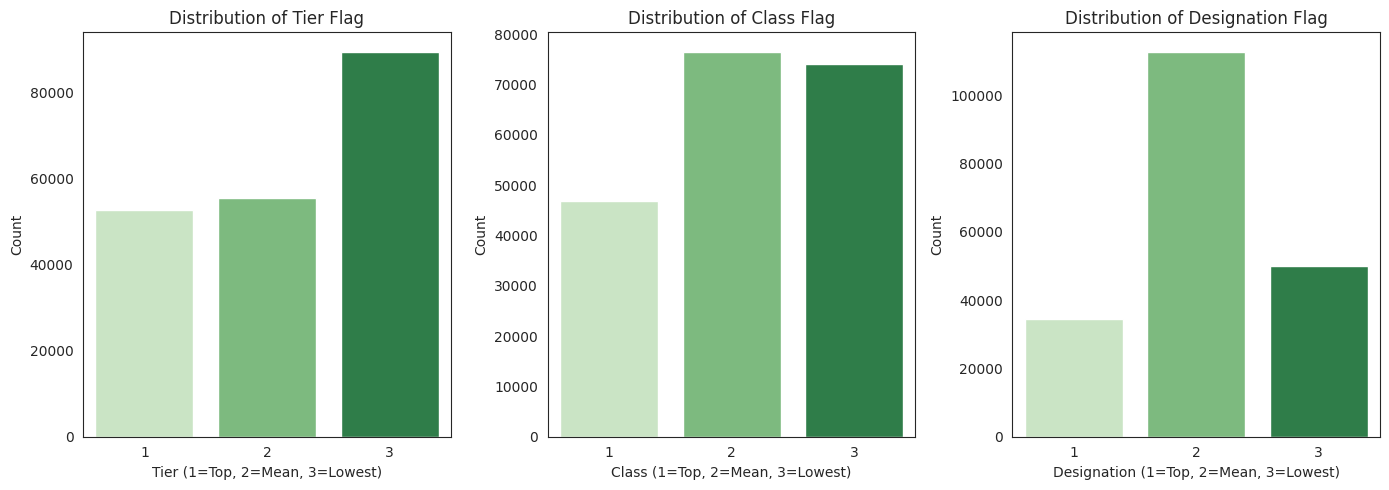

In [48]:
# Single-flag distribution
plt.figure(figsize=(14, 5))

#Countplot for tier
plt.subplot(1,3,1)
sns.countplot(data=df, x="tier", palette = 'Greens')
plt.title("Distribution of Tier Flag")
plt.xlabel("Tier (1=Top, 2=Mean, 3=Lowest)")
plt.ylabel("Count")

#Countplot for class
plt.subplot(1,3,2)
sns.countplot(data=df, x="class", palette = 'Greens')
plt.title("Distribution of Class Flag")
plt.xlabel("Class (1=Top, 2=Mean, 3=Lowest)")
plt.ylabel("Count")

#Countplot for designation
plt.subplot(1,3,3)
sns.countplot(data=df, x="designation", palette = 'Greens')
plt.title("Distribution of Designation Flag")
plt.xlabel("Designation (1=Top, 2=Mean, 3=Lowest)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


**Observations:**

- The plot clearly shows that most employees earn below their group's average CTC, suggesting that the majority fall into the lower earning segment relative to company, role, or experience benchmarks.

- There is a significant imbalance, with only a small fraction of employees earning at or above the average—indicating that the "above average" earners are an exception rather than the norm.

- The overall distribution is highly skewed, highlighting a potential salary disparity where very few high earners drive the average upward, while most employees receive comparatively lower compensation.

In [49]:
df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'years_of_experience', 'mean_ctc', 'median_ctc',
       'max_ctc', 'min_ctc', 'std_ctc', 'num_employees', 'designation',
       'mean_ctc_class', 'class', 'mean_ctc_tier', 'tier'],
      dtype='object')

# **Data Preprocessing**

## **Dropping Unnecessary Columns**

In [50]:
for col in ['mean_ctc', 'median_ctc', 'max_ctc', 'min_ctc', 'std_ctc', 'num_employees', 'mean_ctc_class', 'mean_ctc_tier']:
    df.drop(col, axis=1, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197473 entries, 0 to 197472
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   company_hash         197473 non-null  object
 1   email_hash           197473 non-null  object
 2   orgyear              197473 non-null  int64 
 3   ctc                  197473 non-null  int64 
 4   job_position         197473 non-null  object
 5   ctc_updated_year     197473 non-null  int64 
 6   years_of_experience  197473 non-null  int64 
 7   designation          197473 non-null  int64 
 8   class                197473 non-null  int64 
 9   tier                 197473 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 15.1+ MB


In [52]:
df.shape

(197473, 10)

## **Encoding**

In [53]:
# Label Encoding categorical columns
label_encoders = {}
categorical_cols = ['company_hash', 'job_position']

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Selecting numerical columns for standardization
numerical_cols = ['ctc', 'years_of_experience']

# Standardizing numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nData preprocessed for Unsupervised Clustering (Label Encoding + Standardization).\n")

df.head()


Data preprocessed for Unsupervised Clustering (Label Encoding + Standardization).



,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,designation,class,tier
0,900,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,-0.175860,431,2020,-0.187370,2,2,2
1,18328,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,-0.731657,275,2019,-0.700741,3,3,3
2,14410,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,0.593705,132,2020,0.069316,2,2,2
3,11257,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,-0.517888,132,2019,-0.444055,3,3,3
4,18790,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,0.080662,275,2019,-0.444055,2,1,1


In [54]:
df.drop('email_hash', axis=1, inplace=True)

# **Unsupervised Learning- Clustering**

## **Checking Clustering Tendency**

## **Hopkins Statistic**

The Hopkins statistic is a measure used to assess the clustering tendency of a dataset. It quantifies how well the data can be clustered by comparing the distribution of distances between real data points and randomly generated points. Here's how to interpret the Hopkins statistic:

**Interpretation of the Hopkins Statistic:**

**Range**:
The Hopkins statistic ranges between 0 and 1.

- A value close to 0 indicates that the data is highly clusterable (i.e., the data has a strong tendency to form clusters).

- A value close to 0.5 suggests that the data is randomly distributed (i.e., no significant clustering tendency).

- A value close to 1 indicates that the data is uniformly distributed (i.e., no clustering tendency).

In [55]:
# Selecting only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Handling missing values (fill NaNs with column median)
df_numeric = df_numeric.fillna(df_numeric.median())

# Standardiinge the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Computing Hopkins Statistic
hopkins_stat = hopkins(df_scaled, df_scaled.shape[0] // 10)  # Using 10% sample
print(f"\nHopkins Statistic: {hopkins_stat:.4f}")

# Interpreting results
if hopkins_stat < 0.5:
    print("Data has a strong tendency to form clusters.")
else:
    print("Data does not have a strong clustering tendency.")


Hopkins Statistic: 0.0716
Data has a strong tendency to form clusters.


## **PCA Visualization for Clustering Tendency**

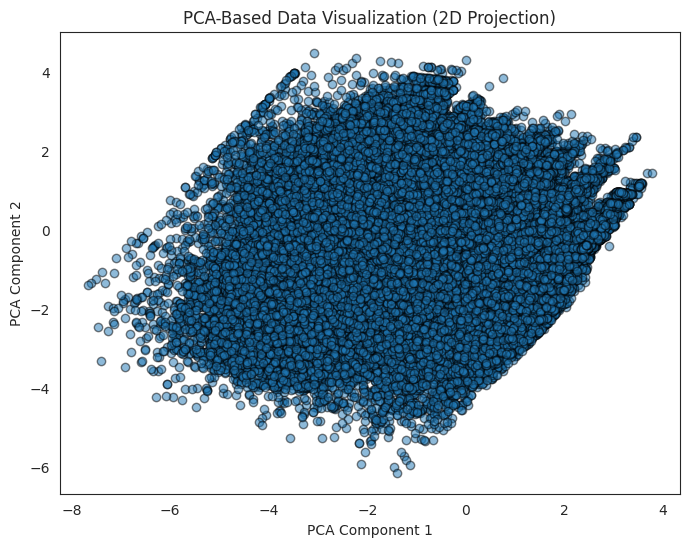

In [56]:
# PCA Transformation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, edgecolors= 'k')
plt.title("PCA-Based Data Visualization (2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

## **Elbow Method for Optimal k**

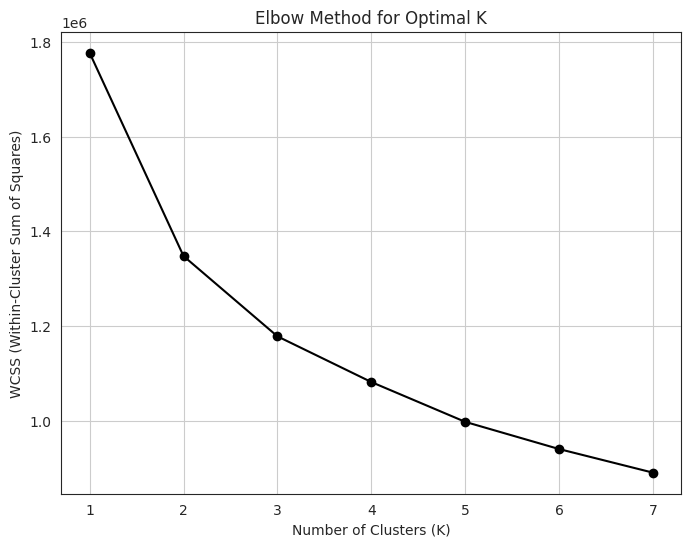

In [57]:
max_clusters = 7
# Selecting only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Filling NaNs with column median
df_numeric = df_numeric.fillna(df_numeric.median())

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Computing WCSS for different cluster numbers
wcss = []
cluster_range = range(1, max_clusters + 1)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10, max_iter=300)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # WCSS (Within-Cluster Sum of Squares)

# Plotting the Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='-', color='black')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


Based on the **Elbow Method**, the optimal number of clusters appears to be **3**, as the curve experiences a significant drop in WCSS before the slope starts to flatten. Choosing **k=3** balances minimizing variance within clusters while avoiding unnecessary complexity.

In [58]:
n_clusters = 3
# Selecting only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Handling missing values (fill NaNs with column median)
df_numeric = df_numeric.fillna(df_numeric.median())

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10, max_iter=300)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [59]:
df.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,designation,class,tier,Cluster
0,900,2016,-0.175860,431,2020,-0.187370,2,2,2,2
1,18328,2018,-0.731657,275,2019,-0.700741,3,3,3,1
2,14410,2015,0.593705,132,2020,0.069316,2,2,2,2
3,11257,2017,-0.517888,132,2019,-0.444055,3,3,3,1
4,18790,2017,0.080662,275,2019,-0.444055,2,1,1,2


## **PCA based Cluster Visulaization**

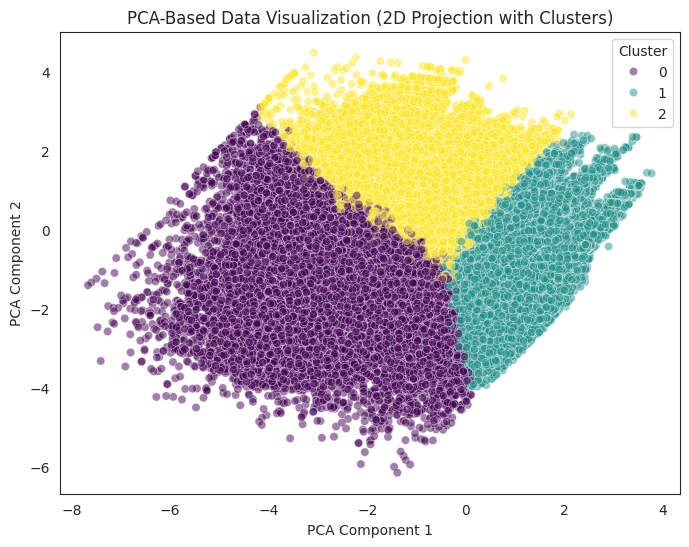

In [60]:
df_numeric = df.select_dtypes(include=[np.number]).drop(columns=['Cluster']).fillna(df.median())
clusters = df['Cluster']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# PCA Transformation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

# Creating a DataFrame with PCA results
pca_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df, alpha=0.5)
plt.title("PCA-Based Data Visualization (2D Projection with Clusters)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

**Observation:**

- **Distinct Cluster Separation –** The PCA projection shows three well-separated clusters (labeled as 0, 1, and 2). This suggests that the clustering algorithm effectively identified distinct patterns in the dataset.

- **Cluster Density and Spread –**
Cluster 0 is the most densely packed, concentrated around negative PCA values.
Cluster 1 appears to be more dispersed, indicating higher variability in this group.
Cluster 2 is also relatively dense but more spread out in the positive PCA range.

- **Potential Feature Influence –** Since PCA is a dimensionality reduction technique, the separation of clusters suggests that the original features contain meaningful variations that the clustering model captured well.

- **Overlapping Boundaries –** While the clusters are mostly distinct, there is some overlap between clusters, particularly between clusters 1 and 2.

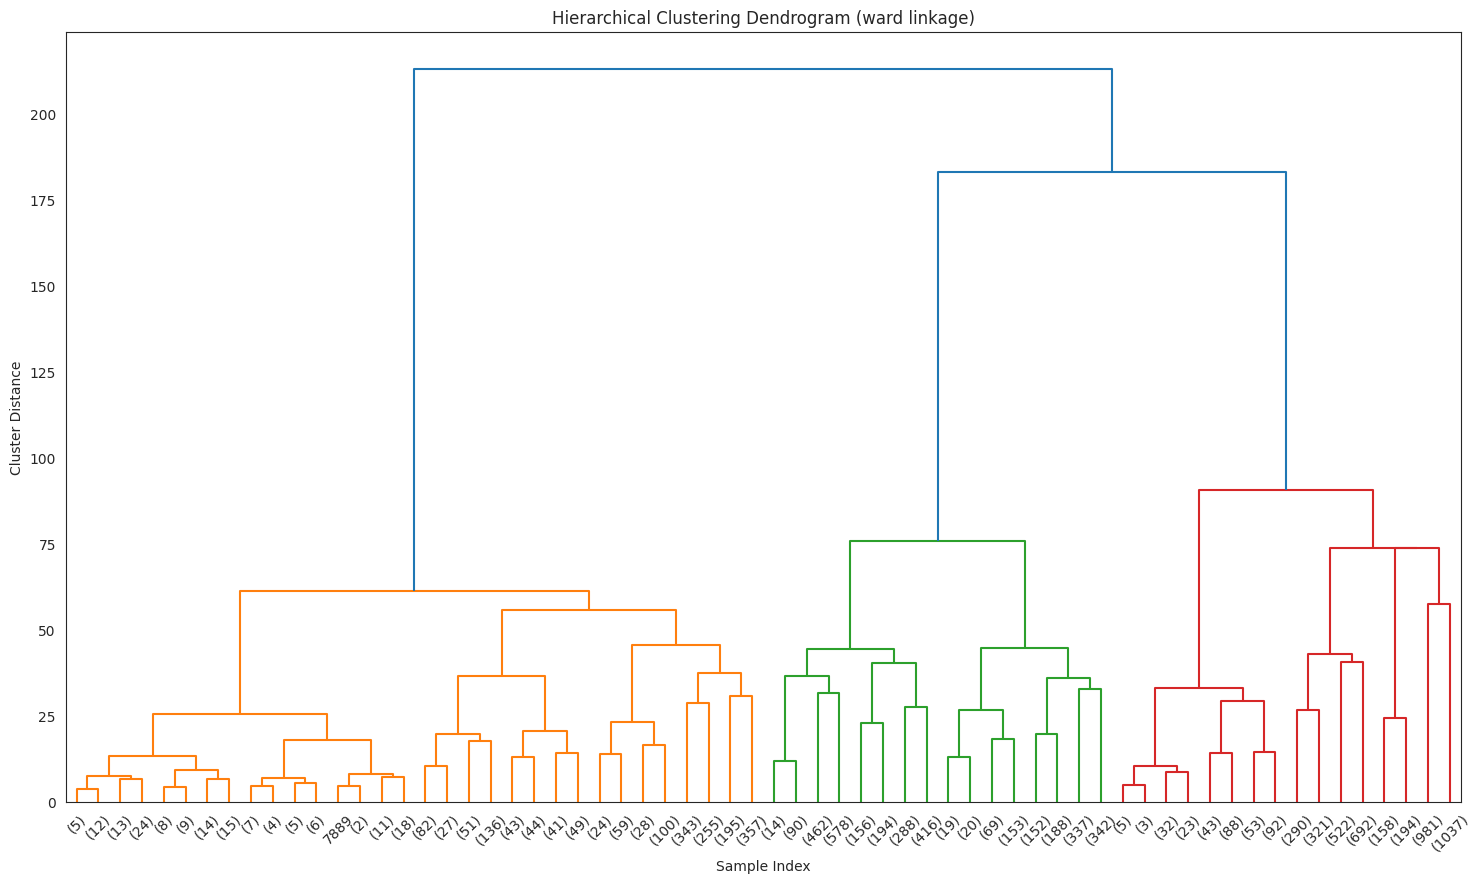

In [61]:
# Selecting only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Handling missing values (fill NaNs with column median)
df_numeric = df_numeric.fillna(df_numeric.median())

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Setting sample size
sample_size = 10000

# Sampling a subset of the dataset for hierarchical clustering
if df_scaled.shape[0] > sample_size:
    np.random.seed(42)  # Ensuring reproducibility
    sample_indices = np.random.choice(df_scaled.shape[0], sample_size, replace=False)
    df_sample = df_scaled[sample_indices]
else:
    df_sample = df_scaled

# Defining linkage method
method = 'ward'

# Performing Hierarchical Clustering
linkage_matrix = linkage(df_sample, method=method)

# Plotting the Dendrogram
plt.figure(figsize=(18, 10))
dendrogram(linkage_matrix, truncate_mode="level", p=5, leaf_rotation=45, leaf_font_size=10)
plt.title(f"Hierarchical Clustering Dendrogram ({method} linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Cluster Distance")
plt.show()


**Insights from the Hierarchical Clustering Dendrogram:**

- **Clear Cluster Formation** – The dendrogram shows a hierarchical structure with distinct branches, indicating that the dataset naturally groups into multiple clusters. The **three major branches** suggest that an optimal number of clusters could be around **three**.

- **Cluster Distance Interpretation** – The vertical height at which clusters merge represents the **distance between clusters**. The highest merges indicate that these clusters are the most distinct from each other.

- **Sub-cluster Patterns** – Within the larger clusters, there are **smaller sub-clusters** forming at different levels. This suggests that the dataset has further natural divisions.

- **Ward’s Linkage Effect** – Since this dendrogram uses **Ward’s linkage**, it ensures that clusters are merged based on **minimizing variance**, leading to compact and well-defined groups.

- **Cutoff for Clustering** – A good rule of thumb for selecting the number of clusters is to **cut the dendrogram at a height where large jumps occur**. In this case, cutting at a distance of around **125-150** would likely result in **three to four meaningful clusters**.

# **INSIGHTS:**

1. **Top Paying Job Titles:**  
   - High-paying job roles predominantly include **Engineering Leadership, Backend Engineer, Product Manager, Devops Engineer, SDET (Software Development Engineer in Test), QA Engineer, Data Scientist, Android Engineer, and FullStack Engineer**.  
   - These roles are **highly technical and strategic**, often requiring specialized skills and extensive experience, which justifies the higher compensation.  

2. **Top Paying Companies:**  
   - The companies offering **some of the highest salaries** are probably either **global technology leaders** or **financial institutions**, which typically offer competitive pay scales to attract top talent.  

3. **CTC Decline**  
   - **Some companies that were once among the top payers are seeing a decline in CTCs over recent years**
   - CTCs have shown a **downward trend** over the years,this could be due to **market shifts, cost-cutting measures, increased competition, or outsourcing trends** affecting salary structures.  

4. **Experienced Learners**:
  - Among professionals with **5 to 7 years of experience**, **Backend Engineer** roles appear prominently in the top-paying positions across multiple companies. This suggests that Backend Engineering is a high-demand and well-compensated field at this experience level.

5. **Data Scientists' varying CTCs**
  - Among Data Scientists classified (earning below their peers within their company), **CTC values range between 600,000 to 1,440,000**. This suggests significant salary variation within the same job role across different companies. Some employees might be underpaid relative to their peers, which could indicate disparities in salary negotiations, company compensation structures, or experience levels.

5. **Overall CTC Trends Over Time:**  
   - The **average CTC has been decreasing over the years**, as evident from the skewed distribution
   - This suggests that **newer job offers may be coming with lower salary packages compared to previous years**, potentially due to **economic downturns, increased workforce supply, or shifting industry trends**.

# **Recommendations**

- **Personalized Learning Paths**  
   - Utilize clustering insights to **offer tailored course recommendations** based on a learner’s experience, job role, and industry trends.  
   - Implement an **AI-driven career advisor** that suggests the most relevant **technical courses, specialization tracks, and career development programs** based on their salary potential and career goals.  
   - Provide **customized upskilling roadmaps** for freshers and experienced professionals to transition into **high-paying roles like Backend Engineering, Data Science, and Product Management**.  
- **Exclusive Content & Membership Tiers**  
   - Develop **premium membership tiers** for high-value learner clusters, offering **exclusive masterclasses, industry insights, and mentorship programs** from top professionals.  
   - Introduce **advanced learning tracks** focused on emerging technologies such as **AI, Cloud Computing, and DevOps**, ensuring learners stay ahead in competitive markets.  
   - Provide members with **priority access to networking events, hiring drives, and expert Q&A sessions** to enhance their career opportunities.  

- **Loyalty Programs & Incentives**  
   - Introduce **loyalty rewards** for learners who continue to upskill, offering **discounts on advanced courses, priority access to career counseling, and special certifications**.  
   - Provide **exclusive career coaching sessions, resume-building assistance, and interview prep workshops** to learners who complete key milestones.  
   - Offer **referral incentives** to encourage **peer learning and community building**, helping Scaler expand its network of skilled professionals.  

- **Targeted Marketing Campaigns**  
   - Design **highly targeted marketing campaigns** based on the specific needs of each learner cluster.  
   - Use **success stories, salary growth trends, and real case studies** to showcase how Scaler has helped professionals **land high-paying jobs** and **career advancements**.  
   - Develop **personalized email & social media outreach** based on learner segments, emphasizing **salary benchmarks, role-specific growth potential, and industry demand**.  

- **Strategic Employer Partnerships**  
   - Strengthen **direct hiring pipelines** with top-paying companies, ensuring **Scaler learners get access to premium job opportunities**.  
   - Offer **Scaler-certified employer partnerships**, where companies can recruit pre-trained candidates directly from Scaler’s talent pool, reducing hiring friction.  
   - Provide exclusive **Scaler Industry Reports** to employers, helping them identify **top talent clusters** and refine hiring strategies.  

- **Upskilling for Salary Growth & Career Transitions**  
   - Since **some sectors show declining salary trends**, professionals in these companies should be **encouraged to transition into more lucrative roles** through targeted upskilling.   
   - Provide specialized training programs that **bridge skill gaps between traditional software development and emerging high-salary domains**.  

- **Real-Time Salary Benchmarking & Career Insights**  
   - Build a **Salary Projection Tool** where learners can input their **experience, skills, and job role** to see potential **salary growth and market demand** over the next few years.  
   - Provide **market intelligence dashboards** that compare **Scaler graduates’ CTC growth vs. industry benchmarks**, helping learners make informed **salary negotiations**.  
   - Continuously update salary trends and job demand forecasts using **real-time industry data**, ensuring Scaler’s courses remain aligned with market needs.  